In [10]:
from citipy import citipy
import openweathermapy.core as owm

from config import api_key

import random
import pandas as pd
import time
import json
import requests
import random 
import time
import datetime
import csv
import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
long_list = []

while len(long_list)<500:
        random_long = random.uniform(-180,180)
        long_list.append(random_long)

lat_list = []

while len(lat_list)<500:
    random_lat = random.uniform(-90,90)
    lat_list.append(random_lat)
    
location_df = pd.DataFrame({"Longitude":long_list,"Latitude":lat_list})

In [3]:
city_list =[]

for x in range(len(location_df)):
    city_list.append(citipy.nearest_city(location_df.iloc[x,0], location_df.iloc[x,1]).city_name)


In [8]:
data_df = pd.DataFrame({'City':city_list,'Longitude':long_list,'Latitude':lat_list})

data_df['Temperature'] = ""
data_df['Humidity'] = ""
data_df['Cloudiness'] = ""
data_df['Wind Speed'] = ""

In [9]:
record_count = 0
record_number = 0
setcount=1

params = {"units": "metric", "appid": api_key}

for index, row in data_df.iterrows():
    base_url = 'http://api.openweathermap.org/data/2.5/weather?'
    city = row['City']
    params['q'] = f'{city}'
    city_data = requests.get(base_url, params=params)
    record_number = record_number+1
    print(f"Data for {city} has been retrieved. A total of {record_number} records have been retrieved.")
    city_data_json = city_data.json()

    data_df.set_value(index,"Temperature",city_data_json.get("main",{}).get("temp_max"))
    data_df.set_value(index,"Wind Speed",city_data_json.get("wind",{}).get("speed"))
    data_df.set_value(index,"Humidity",city_data_json.get("main",{}).get("humidity"))
    data_df.set_value(index,"Cloudiness",city_data_json.get("clouds",{}).get("all"))

    
    if record_count < 50:
        record_count=record_count+1
    elif record_count == 50:
        time.sleep(61)
        record_count= 1
        setcount = setcount+1

Data for harper has been retrieved. A total of 1 records have been retrieved.
Data for marcona has been retrieved. A total of 2 records have been retrieved.
Data for pontes e lacerda has been retrieved. A total of 3 records have been retrieved.
Data for illoqqortoormiut has been retrieved. A total of 4 records have been retrieved.
Data for punta arenas has been retrieved. A total of 5 records have been retrieved.
Data for pangnirtung has been retrieved. A total of 6 records have been retrieved.
Data for jamestown has been retrieved. A total of 7 records have been retrieved.
Data for kapaa has been retrieved. A total of 8 records have been retrieved.
Data for punta arenas has been retrieved. A total of 9 records have been retrieved.
Data for rawson has been retrieved. A total of 10 records have been retrieved.
Data for ponta do sol has been retrieved. A total of 11 records have been retrieved.
Data for trofors has been retrieved. A total of 12 records have been retrieved.
Data for punta

Data for thinadhoo has been retrieved. A total of 102 records have been retrieved.
Data for bluff has been retrieved. A total of 103 records have been retrieved.
Data for barrow has been retrieved. A total of 104 records have been retrieved.
Data for torbay has been retrieved. A total of 105 records have been retrieved.
Data for mar del plata has been retrieved. A total of 106 records have been retrieved.
Data for poya has been retrieved. A total of 107 records have been retrieved.
Data for verkhnevilyuysk has been retrieved. A total of 108 records have been retrieved.
Data for upernavik has been retrieved. A total of 109 records have been retrieved.
Data for vangaindrano has been retrieved. A total of 110 records have been retrieved.
Data for duldurga has been retrieved. A total of 111 records have been retrieved.
Data for gamba has been retrieved. A total of 112 records have been retrieved.
Data for hithadhoo has been retrieved. A total of 113 records have been retrieved.
Data for lo

Data for taolanaro has been retrieved. A total of 202 records have been retrieved.
Data for bambous virieux has been retrieved. A total of 203 records have been retrieved.
Data for petropavlovsk-kamchatskiy has been retrieved. A total of 204 records have been retrieved.
Data for tarudant has been retrieved. A total of 205 records have been retrieved.
Data for rikitea has been retrieved. A total of 206 records have been retrieved.
Data for hermanus has been retrieved. A total of 207 records have been retrieved.
Data for albany has been retrieved. A total of 208 records have been retrieved.
Data for hilo has been retrieved. A total of 209 records have been retrieved.
Data for nizhneyansk has been retrieved. A total of 210 records have been retrieved.
Data for tasiilaq has been retrieved. A total of 211 records have been retrieved.
Data for ushuaia has been retrieved. A total of 212 records have been retrieved.
Data for henties bay has been retrieved. A total of 213 records have been retr

Data for ternate has been retrieved. A total of 302 records have been retrieved.
Data for illoqqortoormiut has been retrieved. A total of 303 records have been retrieved.
Data for sitka has been retrieved. A total of 304 records have been retrieved.
Data for saldanha has been retrieved. A total of 305 records have been retrieved.
Data for nizhneyansk has been retrieved. A total of 306 records have been retrieved.
Data for aklavik has been retrieved. A total of 307 records have been retrieved.
Data for vao has been retrieved. A total of 308 records have been retrieved.
Data for ahuimanu has been retrieved. A total of 309 records have been retrieved.
Data for karur has been retrieved. A total of 310 records have been retrieved.
Data for rikitea has been retrieved. A total of 311 records have been retrieved.
Data for vostok has been retrieved. A total of 312 records have been retrieved.
Data for new norfolk has been retrieved. A total of 313 records have been retrieved.
Data for khatanga 

Data for betioky has been retrieved. A total of 402 records have been retrieved.
Data for jamestown has been retrieved. A total of 403 records have been retrieved.
Data for sturgis has been retrieved. A total of 404 records have been retrieved.
Data for yellowknife has been retrieved. A total of 405 records have been retrieved.
Data for lazaro cardenas has been retrieved. A total of 406 records have been retrieved.
Data for lebu has been retrieved. A total of 407 records have been retrieved.
Data for sedelnikovo has been retrieved. A total of 408 records have been retrieved.
Data for lorengau has been retrieved. A total of 409 records have been retrieved.
Data for rikitea has been retrieved. A total of 410 records have been retrieved.
Data for heidelberg has been retrieved. A total of 411 records have been retrieved.
Data for khasan has been retrieved. A total of 412 records have been retrieved.
Data for labuhan has been retrieved. A total of 413 records have been retrieved.
Data for s

In [32]:
data_df = data_df.dropna().reset_index()

In [40]:
data_df = data_df.convert_objects(convert_numeric=True)

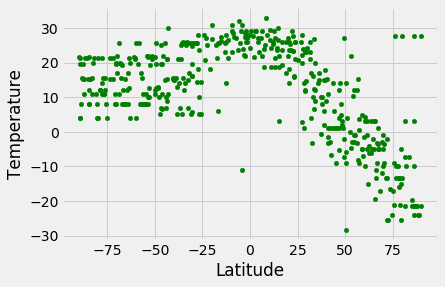

In [42]:
data_df.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="green")

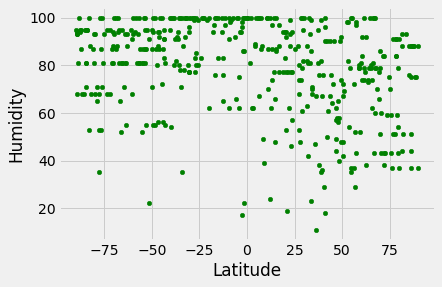

In [43]:
data_df.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="green")

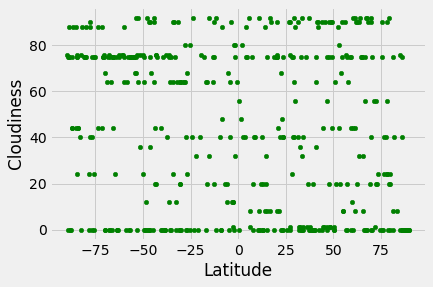

In [44]:
data_df.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="green")

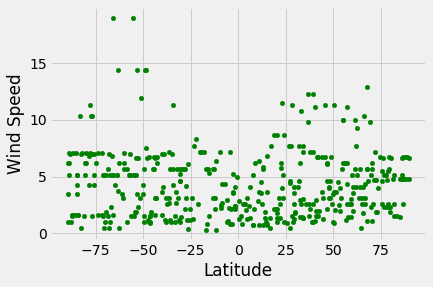

In [45]:
data_df.plot(kind="scatter",x="Latitude",y="Wind Speed",grid=True,color="green")